### The idea is to classify the restaurant reviews 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# loading the data
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.shape

(1000, 2)

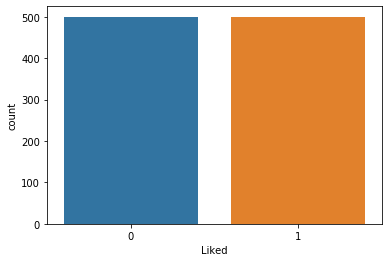

In [7]:
sns.countplot(x = 'Liked', data= data)

In [8]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

### Data Cleaning

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
corpus = []
ps = PorterStemmer()

for i in range(data.shape[0]):
    text = re.sub(pattern= '[^a-zA-Z]', repl= '', string= data['Review'][i])
    text = text.lower()
    text = text.split()
    text = [words for words in text if words not in set(stopwords.words('english'))]
    text = [ps.stem(words) for words in text]
    text = ' '.join(text)
    corpus.append(text)

In [13]:
corpus[:10]

['wowlovedthisplac',
 'crustisnotgood',
 'nottastyandthetexturewasjustnasti',
 'stoppedbyduringthelatemaybankholidayoffricksteverecommendationandlovedit',
 'theselectiononthemenuwasgreatandsowerethepric',
 'nowiamgettingangryandiwantmydamnpho',
 'honesltyitdidnttastethatfresh',
 'thepotatoeswerelikerubberandyoucouldtelltheyhadbeenmadeupaheadoftimebeingkeptunderawarm',
 'thefriesweregreattoo',
 'agreattouch']

### Split the data

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [18]:
# train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model building

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Model evaluation

In [29]:
from sklearn.model_selection import cross_val_score
for i in [5,10]:
    CV_score = cross_val_score(estimator= MultinomialNB(), X = X_train,y = y_train, cv = i )
    print('CV score: {} for cv = {}'.format(CV_score, i))

CV score: [0.50625 0.50625 0.50625 0.50625 0.50625] for cv = 5
CV score: [0.5125 0.5    0.5    0.5125 0.5    0.5    0.5    0.5125 0.5125 0.5125] for cv = 10


In [30]:
print('traing score: {}'.format(nb_classifier.score(X_train, y_train)))
print('testing score: {}'.format(nb_classifier.score(X_test, y_test)))

traing score: 1.0
testing score: 0.485


In [31]:
y_pred = nb_classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 97,   0],
       [103,   0]], dtype=int64)

- Lets check with **Randomforest** also

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
from sklearn.model_selection import cross_val_score
for i in [5,10]:
    CV_score = cross_val_score(estimator= RandomForestClassifier(), X = X_train,y = y_train, cv = i )
    print('CV score: {} for cv = {}'.format(CV_score, i))

CV score: [0.50625 0.50625 0.50625 0.50625 0.50625] for cv = 5
CV score: [0.5125 0.5    0.5    0.5125 0.5    0.5    0.5    0.5125 0.5125 0.5125] for cv = 10
